<a href="https://colab.research.google.com/github/Fazlibeqir/Timski-Proekt/blob/main/train_v2_augmented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup & Imports

In [1]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.1 MB/s eta 0:00:00


In [5]:
!pip install sympy==1.12 --force-reinstall


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 44.6 MB/s eta 0:00:00
  Attempting uninstall: mpmath
    Found existing installation: mpmath 1.3.0
    Uninstalling mpmath-1.3.0:
      Successfully uninstalled mpmath-1.3.0
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.12 which is incompatible.


In [6]:
from ultralytics import YOLO
import torch
import os

If locally needs GPU

In [3]:
# Check GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


## Dataset Check (Optional)
If you want to double-check that your dataset is correctly placed and has the expected files:

/content/drive/MyDrive/Insect Detection/dataset.zip

In [7]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [8]:
!ls -lh /content/drive/MyDrive/Insect\ Detection/

total 4.2G
-rw------- 1 root root 4.2G Jun  9 17:42 cleaned_dataset.zip
-rw------- 1 root root  276 Jun 11 17:50 compare_all_versions.ipynb
-rw------- 1 root root 1.6K Jun 10 17:22 compared_models.ipynb
-rw------- 1 root root  15K May 30 22:00 fetch_data.ipynb
-rw------- 1 root root  324 May 29 23:17 test_and_eval.ipynb
-rw------- 1 root root 1.5M Jun 11 18:03 train_v1_baseline.ipynb
-rw------- 1 root root  11K Jun 11 18:18 train_v2_augmented.ipynb
-rw------- 1 root root  33K Jun 11 18:17 train_v3_bigger_model.ipynb
drwx------ 2 root root 4.0K May 28 16:56 utils
-rw------- 1 root root 909K May 28 16:44 YOLO8.ipynb


In [9]:
!cp /content/drive/MyDrive/Insect\ Detection/cleaned_dataset.zip .

In [10]:
!unzip -q cleaned_dataset.zip -d .

In [11]:
from pathlib import Path

#dataset is extracted into /content/dataset/content/dataset
base_path = Path("/content/dataset/content/dataset")
for split in ['train','test', 'val']:
    split_path = base_path / split
    image_count = len(list(split_path.rglob('*.jpg')))
    print(f"{split.capitalize()} images: {image_count}")

Train images: 1766
Test images: 384
Val images: 391


## Load and Train the Baseline Model

In [12]:
# Load YOLOv8 baseline
model = YOLO('yolov8m-cls.pt')


# Train the model
model.train(
    data=base_path,
    epochs=25,
    imgsz=224,
    batch=64,
    patience = 10,
    workers = 4,
    device=0 if torch.cuda.is_available() else 'cpu',
    name='yolov8m-cls_augmented',
    augment=True,
)

100%|██████████| 32.7M/32.7M [00:00<00:00, 117MB/s]


Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/content/dataset, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8m-cls_augmented, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, po

100%|██████████| 5.35M/5.35M [00:00<00:00, 96.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 46.1±29.1 MB/s, size: 427.4 KB)


train: Scanning /content/dataset/content/dataset/train... 3514 images, 0 corrupt: 100%|██████████| 3514/3514 [00:04<00:00, 812.64it/s]

train: New cache created: /content/dataset/content/dataset/train.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1217.8±928.2 MB/s, size: 1448.8 KB)


val: Scanning /content/dataset/content/dataset/val... 748 images, 0 corrupt: 100%|██████████| 748/748 [00:00<00:00, 1891.45it/s]


val: New cache created: /content/dataset/content/dataset/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000161, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/yolov8m-cls_augmented
Starting training for 25 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/25      2.41G       4.06         64        224:   4%|▎         | 2/55 [00:10<04:00,  4.53s/it]


100%|██████████| 755k/755k [00:00<00:00, 22.0MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:19<00:00,  3.17s/it]

                   all     0.0428      0.167



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.39s/it]

                   all      0.143      0.412



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.44s/it]

                   all      0.259      0.596



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.22s/it]

                   all      0.361      0.701



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.69s/it]

                   all      0.432      0.773



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.23s/it]

                   all       0.48      0.803



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.60s/it]

                   all      0.517      0.834



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.32s/it]

                   all      0.549      0.862



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.54s/it]

                   all      0.559       0.87



      Epoch    GPU_mem       loss  Instances       Size


      10/25      3.14G      1.146         58        224: 100%|██████████| 55/55 [02:10<00:00,  2.38s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.05s/it]

                   all      0.592      0.892



      Epoch    GPU_mem       loss  Instances       Size


      11/25      3.17G      1.015         58        224: 100%|██████████| 55/55 [02:04<00:00,  2.27s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.79s/it]

                   all      0.624      0.889



      Epoch    GPU_mem       loss  Instances       Size


      12/25       3.2G     0.9047         58        224: 100%|██████████| 55/55 [02:05<00:00,  2.29s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.81s/it]

                   all      0.619      0.908



      Epoch    GPU_mem       loss  Instances       Size


      13/25      3.22G     0.8238         58        224: 100%|██████████| 55/55 [02:02<00:00,  2.22s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.76s/it]

                   all       0.63      0.905



      Epoch    GPU_mem       loss  Instances       Size


      14/25      3.25G     0.7659         58        224: 100%|██████████| 55/55 [02:05<00:00,  2.28s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:11<00:00,  1.98s/it]

                   all      0.643      0.906



      Epoch    GPU_mem       loss  Instances       Size


      15/25      3.32G       0.68         58        224: 100%|██████████| 55/55 [02:07<00:00,  2.32s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.15s/it]

                   all      0.652      0.912



      Epoch    GPU_mem       loss  Instances       Size


      16/25      3.48G     0.6252         58        224: 100%|██████████| 55/55 [02:14<00:00,  2.44s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.46s/it]

                   all      0.651       0.91



      Epoch    GPU_mem       loss  Instances       Size


      17/25      3.51G      0.585         58        224: 100%|██████████| 55/55 [02:03<00:00,  2.25s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:16<00:00,  2.81s/it]

                   all      0.662      0.916



      Epoch    GPU_mem       loss  Instances       Size


      18/25      3.63G     0.5265         58        224: 100%|██████████| 55/55 [02:04<00:00,  2.27s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.28s/it]

                   all      0.672      0.918



      Epoch    GPU_mem       loss  Instances       Size


      19/25      3.69G     0.5164         58        224: 100%|██████████| 55/55 [02:07<00:00,  2.32s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.48s/it]

                   all      0.679       0.92



      Epoch    GPU_mem       loss  Instances       Size


      20/25      3.78G     0.4772         58        224: 100%|██████████| 55/55 [02:19<00:00,  2.53s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.35s/it]

                   all      0.676      0.916



      Epoch    GPU_mem       loss  Instances       Size


      21/25       3.9G     0.4647         58        224: 100%|██████████| 55/55 [02:13<00:00,  2.43s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.31s/it]

                   all      0.674      0.916



      Epoch    GPU_mem       loss  Instances       Size


      22/25      4.03G     0.4562         58        224: 100%|██████████| 55/55 [02:14<00:00,  2.45s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.17s/it]

                   all      0.678      0.917



      Epoch    GPU_mem       loss  Instances       Size


      23/25      4.05G     0.4066         58        224: 100%|██████████| 55/55 [02:16<00:00,  2.48s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.40s/it]

                   all      0.683      0.922



      Epoch    GPU_mem       loss  Instances       Size


      24/25      4.17G     0.4303         58        224: 100%|██████████| 55/55 [02:14<00:00,  2.45s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.10s/it]

                   all      0.686      0.914



      Epoch    GPU_mem       loss  Instances       Size


      25/25      4.22G     0.4243         58        224: 100%|██████████| 55/55 [02:11<00:00,  2.40s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:14<00:00,  2.48s/it]

                   all      0.684      0.918



25 epochs completed in 1.013 hours.
Optimizer stripped from runs/classify/yolov8m-cls_augmented/weights/last.pt, 31.8MB
Optimizer stripped from runs/classify/yolov8m-cls_augmented/weights/best.pt, 31.8MB

Validating runs/classify/yolov8m-cls_augmented/weights/best.pt...
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,836,954 parameters, 0 gradients, 41.7 GFLOPs
train: /content/dataset/content/dataset/train... found 3514 images in 58 classes ✅ 
ERROR ❌ val: /content/dataset/content/dataset/val... found 748 images in 57 classes (requires 58 classes, not 57)
ERROR ❌ test: /content/dataset/content/dataset/test... found 748 images in 57 classes (requires 58 classes, not 57)


               classes   top1_acc   top5_acc:   0%|          | 0/6 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  17%|█▋        | 1/6 [00:07<00:37,  7.56s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  33%|███▎      | 2/6 [00:07<00:12,  3.20s/it]


  0%|          | 0.00/22.2M [00:00<?, ?B/s]
100%|██████████| 22.2M/22.2M [00:00<00:00, 110MB/s] 


WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  50%|█████     | 3/6 [00:16<00:17,  5.96s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  67%|██████▋   | 4/6 [00:17<00:07,  3.66s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  83%|████████▎ | 5/6 [00:24<00:05,  5.02s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:24<00:00,  4.10s/it]


                   all      0.683      0.922
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/yolov8m-cls_augmented


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79e72784f7d0>
curves: []
curves_results: []
fitness: 0.802807480096817
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.6831550598144531, 'metrics/accuracy_top5': 0.9224599003791809, 'fitness': 0.802807480096817}
save_dir: PosixPath('runs/classify/yolov8m-cls_augmented')
speed: {'preprocess': 0.10111470721755386, 'inference': 0.8332129625687424, 'loss': 0.00011565107148359181, 'postprocess': 0.0003412513343941353}
task: 'classify'
top1: 0.6831550598144531
top5: 0.9224599003791809

## View Results (Optional)

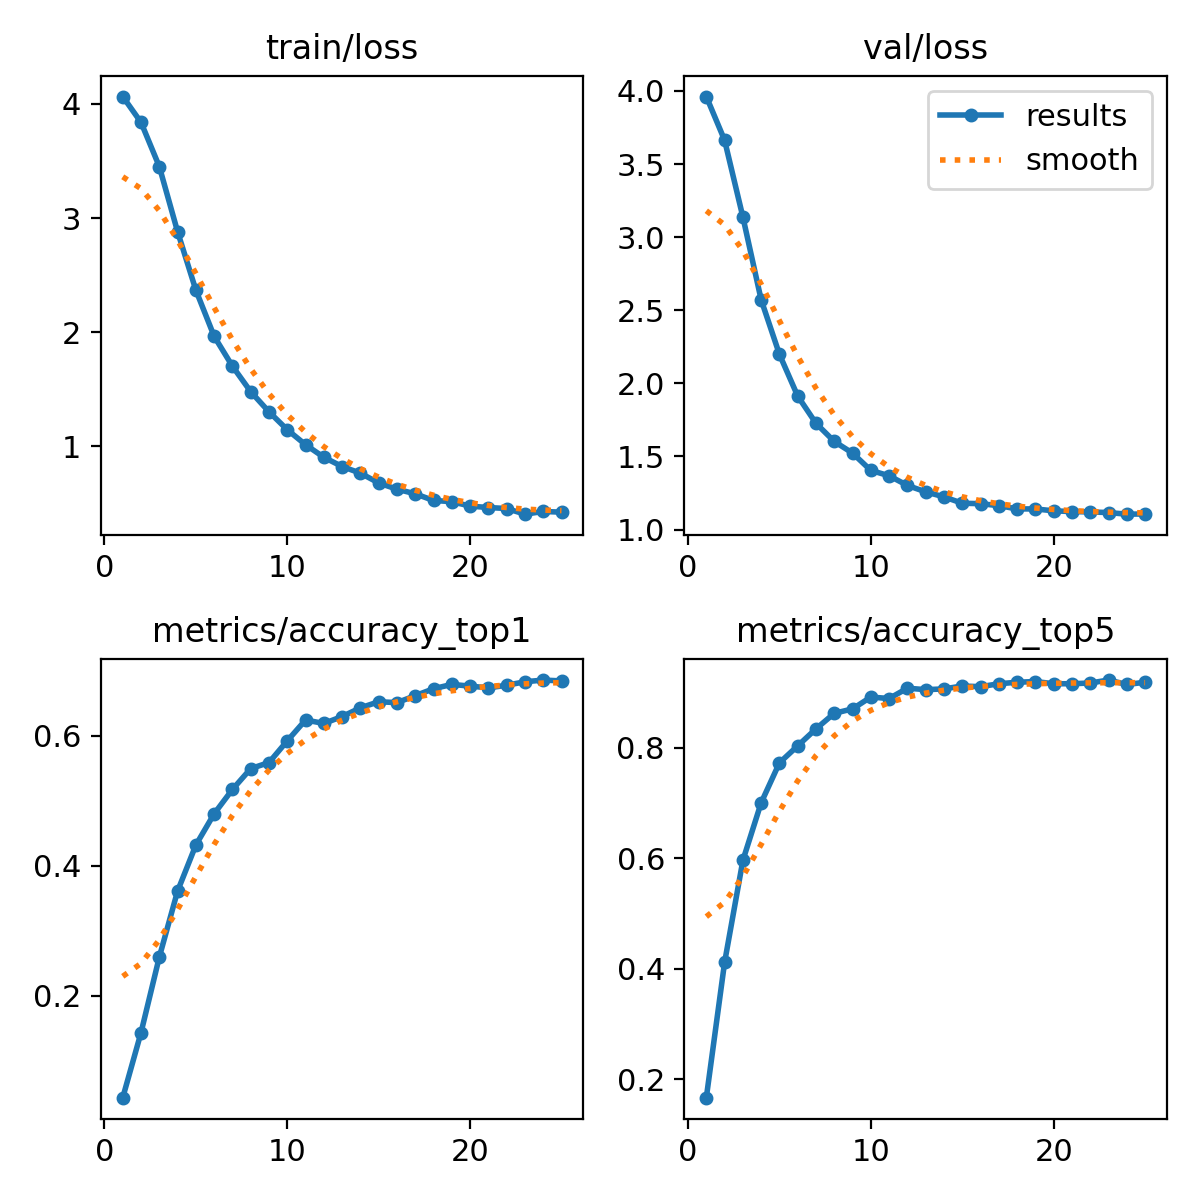

In [13]:
# After training, check results
from IPython.display import Image, display
results_dir = Path("runs/classify/yolov8m-cls_augmented")
display(Image(filename=results_dir / "results.png"))

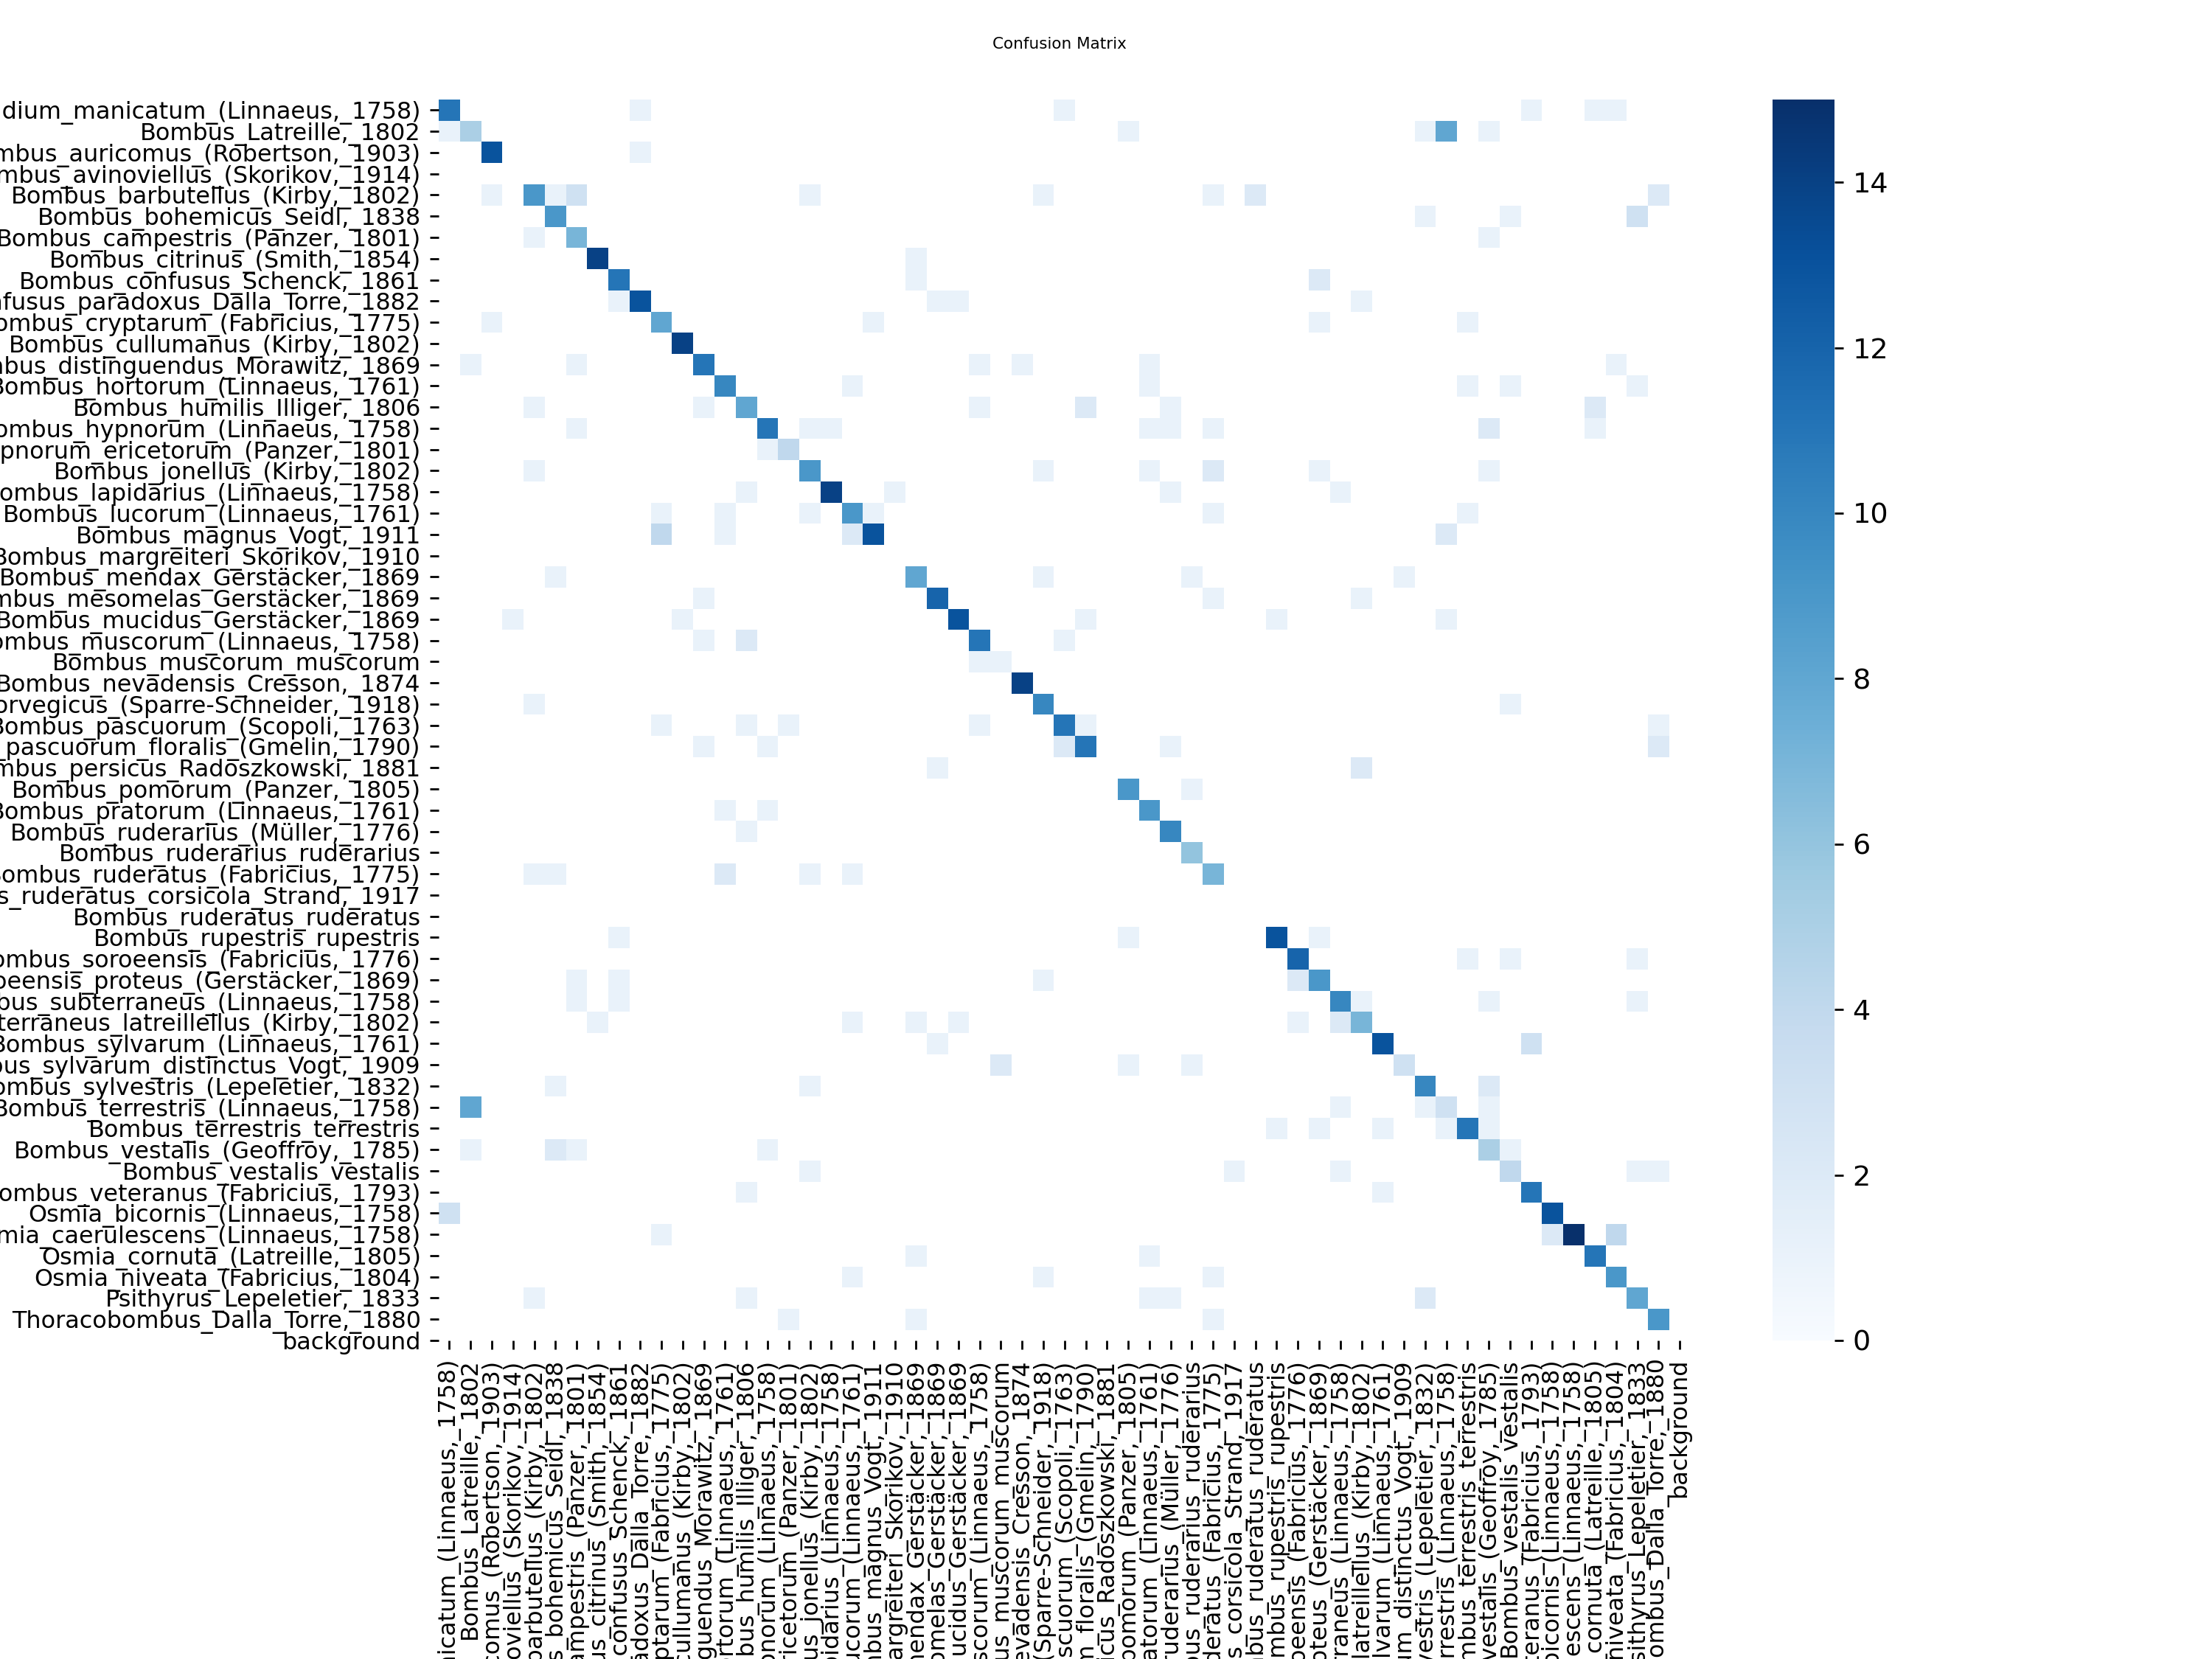

In [14]:
display(Image(filename=results_dir / "confusion_matrix.png"))

In [16]:
!cp /content/runs/classify/yolov8m-cls_augmented/results.csv /content/drive/MyDrive/Insect\ Detection/utils/resultsV2.csv